In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datasets/iris.csv')

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

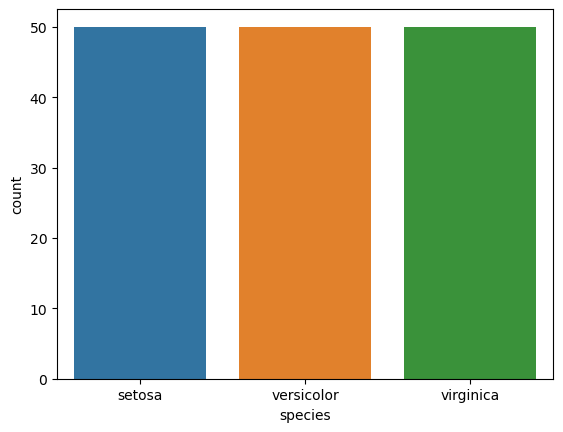

In [5]:
sns.countplot(x='species',data=df)

In [6]:
df.corr()

C:\Users\ckv20\AppData\Local\Temp\ipykernel_32084\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


C:\Users\ckv20\AppData\Local\Temp\ipykernel_32084\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

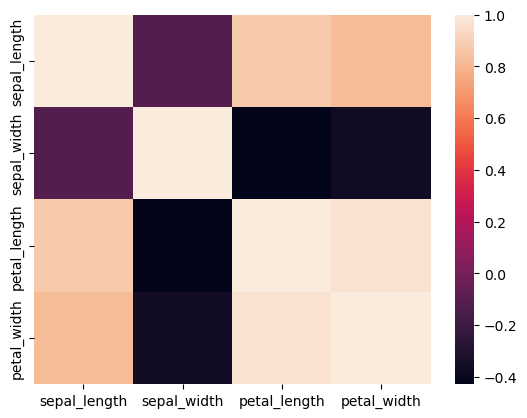

In [7]:
sns.heatmap(df.corr())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

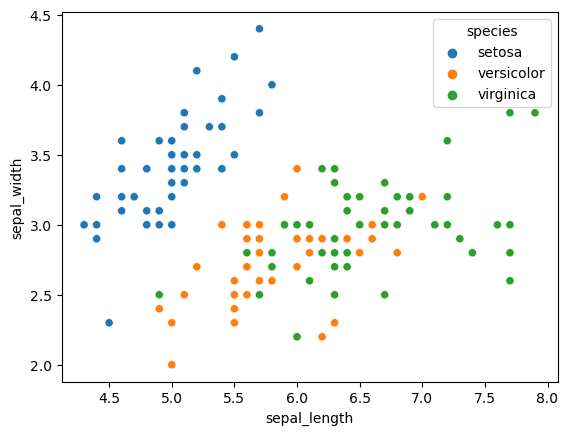

In [10]:
sns.scatterplot(x='sepal_length',y='sepal_width' , data=df,hue='species')

<Axes: xlabel='sepal_length', ylabel='petal_length'>

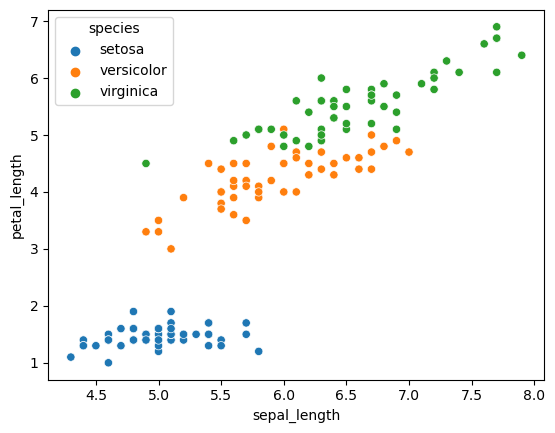

In [11]:
sns.scatterplot(x='sepal_length',y='petal_length' , data=df,hue='species')

<Axes: xlabel='petal_width', ylabel='petal_length'>

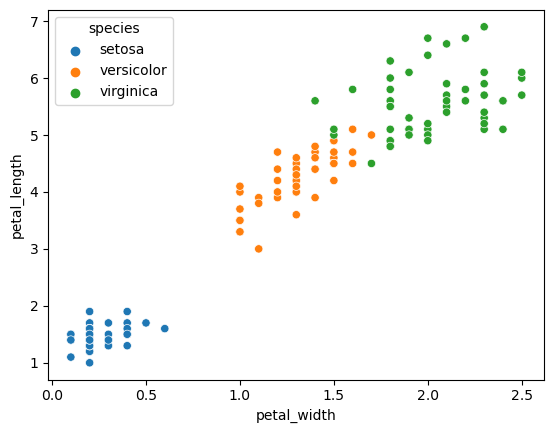

In [12]:
sns.scatterplot(x='petal_width',y='petal_length' , data=df,hue='species')

In [13]:
X=df.drop(columns=['species'])
y= df['species']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
scaler =StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

# Multiclassifcation

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='saga',multi_class='ovr',max_iter=5000,random_state=1)

In [17]:
learning  = log_reg.fit(scaled_X_train,y_train)

In [18]:
y_pred = learning.predict(scaled_X_test)

In [19]:
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [20]:
wrong_prediction = 0
l_y_pred = list(y_pred)
l_y_test = list(y_test)

for i in range(0,len(y_pred)):
    #print(y_pred[i] == y_test[i])
    if l_y_pred[i] == l_y_test[i] :
        pass
    else :
        wrong_prediction +=1
print(wrong_prediction)
    

    

6


In [21]:
wrong_prediction/len(y_pred)

0.2

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

accuracy_score(y_test,y_pred)

0.8

In [26]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0,  7,  6],
       [ 0,  0,  6]], dtype=int64)

In [22]:
accuracy = (1-_)*100
accuracy

80.0

In [23]:
scaled_X_train

array([[ 0.31553662, -0.04578885,  0.44767531,  0.23380268],
       [ 2.2449325 , -0.04578885,  1.29769171,  1.39742892],
       [-0.2873996 , -1.24028061,  0.05100098, -0.15407273],
       [ 0.67729835, -0.52358555,  1.01435291,  1.13884531],
       [-0.04622511, -0.52358555,  0.73101411,  1.52672073],
       [-0.64916132,  1.62649961, -1.30902526, -1.31769898],
       [-0.40798684, -1.71807731,  0.10766874,  0.10451088],
       [-0.76974857,  0.90980456, -1.36569302, -1.31769898],
       [ 0.79788559, -0.52358555,  0.44767531,  0.36309449],
       [ 1.03906007, -1.24028061,  1.12768843,  0.7509699 ],
       [ 1.15964732, -0.04578885,  0.95768515,  1.13884531],
       [-0.89033581,  1.14870291, -1.36569302, -1.18840717],
       [ 0.19494938, -1.95697567,  0.67434635,  0.36309449],
       [ 0.5567111 , -0.2846872 ,  1.01435291,  0.7509699 ],
       [ 0.91847283, -0.2846872 ,  0.44767531,  0.10451088],
       [ 2.2449325 , -1.00138226,  1.75103379,  1.39742892],
       [-0.16681235,  1.

In [24]:
learning.predict([[ -3.64,- 0.4578885, - 0.44767531,  -0.23380268]])

array(['setosa'], dtype=object)